Netflix Movies and TV Shows dataset from Kaggle and perform following operation :

1.Make a visualization showing the total number of movies watched by children
2.Make a visualization showing the total number of standup comedies
3.Make a visualization showing most watched shows.
4.Make a visualization showing highest rated show

In [4]:
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:
df.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,


In [21]:
kids_movie = df['listed_in'].str.contains("Children & Family Movies", case=False, regex=False)
kids_tv = df['listed_in'].str.contains("Kids' TV", case=False, regex=False)

In [22]:
df_kids = df[kids_movie | kids_tv]

In [23]:
df_kids.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,relevant
108,s109,TV Show,3Below: Tales of Arcadia,NaN,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,2019-07-12,2019,TV-Y7,,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a...",2019.0,7.0,2,0
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,2018,TV-Y7,,Kids' TV,Paw-esome tales abound when singing furry frie...,2020.0,10.0,2,0
113,s114,Movie,48 Christmas Wishes,"Marco Deufemia, Justin G. Dyck","Khiyla Aynne, Noah Dyer, Maya Franzoi, Clara K...",Canada,2017-12-20,2017,TV-G,84,"Children & Family Movies, Comedies",When a small town's letters to Santa accidenta...,2017.0,12.0,,0
145,s146,Movie,A 2nd Chance,Clay Glen,"Nina Pearce, Adam Tuominen, Emily Morris, Amy ...",Australia,2017-07-01,2011,PG,95,"Children & Family Movies, Dramas, Sports Movies",A gymnast lacks the confidence she needs to re...,2017.0,7.0,,0
147,s148,Movie,A Babysitter's Guide to Monster Hunting,Rachel Talalay,"Tamara Smart, Oona Laurence, Tom Felton, Troy ...",United States,2020-10-15,2020,TV-PG,99,Children & Family Movies,"Recruited by a secret society of babysitters, ...",2020.0,10.0,,0


In [24]:
stand_up = df['listed_in'].str.contains("Stand-Up Comedy", case=False, regex=False)

In [25]:
df_standup = df[stand_up]
df_standup.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,relevant
197,s198,TV Show,A Little Help with Carol Burnett,NaN,"Carol Burnett, Russell Peters, Mark Cuban, Tar...",United States,2018-05-04,2018,TV-G,,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy icon Carol Burnett returns to TV with a...,2018.0,5.0,1,1
220,s221,Movie,A Russell Peters Christmas,Henry Sarwer-Foner,"Russell Peters, Pamela Anderson, Michael Bublé...",Canada,2013-11-01,2011,NR,44,Stand-Up Comedy,"Inspired by the variety shows of the 1970s, ""A...",2013.0,11.0,,1
284,s285,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,2017-08-04,2017,TV-PG,,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa...",2017.0,8.0,2,1
305,s306,Movie,Adam Devine: Best Time of Our Lives,Jay Karas,Adam Devine,United States,2019-06-18,2019,TV-MA,59,Stand-Up Comedy,Frenetic comic Adam Devine talks teen awkwardn...,2019.0,6.0,,1
307,s308,Movie,ADAM SANDLER 100% FRESH,Steve Brill,Adam Sandler,United States,2018-10-23,2018,TV-MA,74,Stand-Up Comedy,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San...",2018.0,10.0,,1


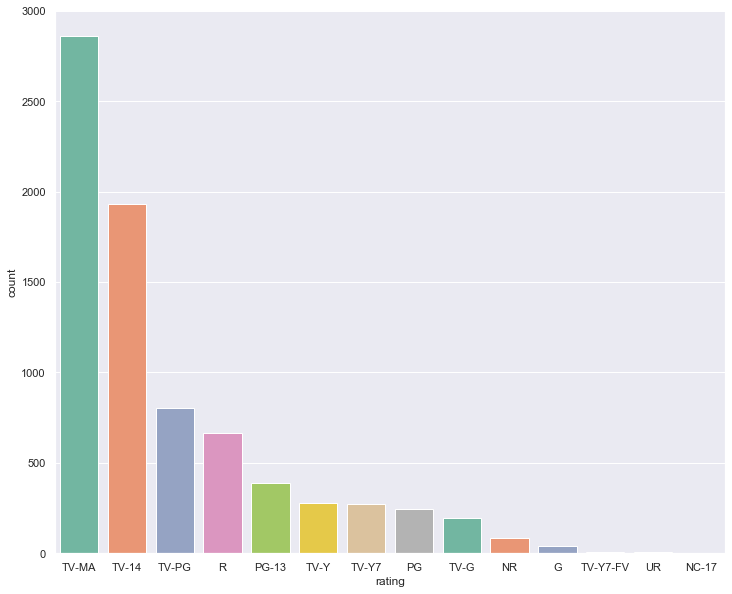

In [27]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])